# Análise exploratória de dados

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns 
from IPython.display import display, Markdown 

## 1. Descrição dos dados

### Conjunto de dados

A análise utiliza o dataset 'Titanic: Machine Learning from Disaster', disponível no Kaggle. A base contém informações sobre passageiros do Titanic, como idade, sexo, classe de cabine, número de familiares a bordo, entre outras variáveis. Com esses dados, é possível realizar uma análise aprofundada sobre o impacto de fatores socioeconômicos e pessoais nas chances de sobrevivência durante o desastre.

In [40]:
df = pd.read_csv('../data/raw/train.csv')
df.to_csv('../data/raw/train.csv', index=False)

#### Dimensão do DataFrame


In [4]:
df.shape

(891, 12)

#### Visão geral dos dados


In [5]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Informações da tabela


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Colunas da tabela


In [7]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Dicionário de dados


In [41]:
df_dc = pd.read_csv('../data/external/Titanic__dataDictionary.csv')
df_dc.head()

,Variable,Definition,Key,Tipo,Subtipo
0,survival,Survival,"0 = No, 1 = Yes",Qualitativa,Nominal
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd",Qualitativa,Ordinal
2,sex,Sex,NaN,Qualitativa,Nominal
3,Age,Age in years,NaN,Quantitativa,Continua
4,sibsp,# of siblings / spouses aboard the Titanic,NaN,Quantitativa,Discreta


#### Adição de duas colunas na documentação


É necessária duas colunas com o tipo e o subtipo das variáveis no discionário, que serão adicionadas abaixo.



In [42]:
caminho = '../data/external/Titanic__dataDictionary.csv'

df_dc = pd.read_csv(caminho)

# adição da coluna tipo
Tipo = [
    'Qualitativa', 'Qualitativa', 'Qualitativa', 'Quantitativa', 
    'Quantitativa', 'Quantitativa', 'Qualitativa', 'Quantitativa', 
    'Qualitativa', 'Qualitativa'
]

# adição da coluna subtipo
Subtipo = [
    'Nominal', 'Ordinal', 'Nominal', 'Continua', 
    'Discreta', 'Discreta', 'Nominal', 'Continua', 
    'Nominal', 'Nominal'
]

df_dc['Tipo'] = Tipo
df_dc['Subtipo'] = Subtipo

df_dc.to_csv(caminho, index=False)


In [43]:
df_dc.head()


,Variable,Definition,Key,Tipo,Subtipo
0,survival,Survival,"0 = No, 1 = Yes",Qualitativa,Nominal
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd",Qualitativa,Ordinal
2,sex,Sex,NaN,Qualitativa,Nominal
3,Age,Age in years,NaN,Quantitativa,Continua
4,sibsp,# of siblings / spouses aboard the Titanic,NaN,Quantitativa,Discreta


In [27]:
df_dc.columns


Index(['Variable', 'Definition', 'Key', 'Tipo', 'Subtipo'], dtype='object')

### Estatísticas Descritivas


Estatísticas descritivas para as variáveis numéricas (média, mediana, desvio padrão, valores mínimos e máximos, quartis).



In [13]:
df.describe().round(2)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


#### Categorias e Frequências


Estatísticas descritivas para variáveis qualitativas, categorias únicas e as frequências.



In [15]:
df = pd.read_csv('../data/raw/train.csv')

colunas_categoricas = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for coluna in colunas_categoricas:
    print(f'Valores e Frequências para a coluna {coluna}:')
    print(df[coluna].value_counts())
    print('\n')

Valores e Frequências para a coluna Survived:
0    549
1    342
Name: Survived, dtype: int64


Valores e Frequências para a coluna Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64


Valores e Frequências para a coluna Sex:
male      577
female    314
Name: Sex, dtype: int64


Valores e Frequências para a coluna Ticket:
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


Valores e Frequências para a coluna Cabin:
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


Valores e Frequências para a coluna Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64




#### Número de categorias por variáveis


In [16]:
df = pd.read_csv('../data/raw/train.csv')

colunas_categoricas = ['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']

categorias_unicas = {}

for coluna in colunas_categoricas:
    categorias_unicas[coluna] = df[coluna].nunique()

for coluna, num_categorias in categorias_unicas.items():
    print(f'{coluna}: {num_categorias}')

Survived: 2
Pclass: 3
Sex: 2
Ticket: 681
Cabin: 147
Embarked: 3


#### Verificação e tratamento de valores ausentes


In [61]:
valores_ausentes = df.isnull().sum()

total_valores = df.shape[0]



analise_ausentes = pd.DataFrame({
    'Valores Ausentes': valores_ausentes,
})

print(analise_ausentes)

             Valores Ausentes
PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                       177
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    2


In [62]:
# Substituir valores ausentes em 'Age' pela mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

# Substituir valores ausentes em 'Cabin' por "Desconhecido"
df['Cabin'].fillna('Desconhecido', inplace=True)

# Substituir valores ausentes em 'Embarked' pela moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [63]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Desconhecido,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Desconhecido,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Desconhecido,S


In [20]:
valores_ausentes = df.isnull().sum()

total_valores = df.shape[0]



analise_ausentes = pd.DataFrame({
    'Valores Ausentes': valores_ausentes,
})

print(analise_ausentes)

             Valores Ausentes
PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                       0
Embarked                    0


In [64]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Desconhecido,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Desconhecido,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Desconhecido,S


### Perguntas

As perguntas de partida e hipóteses serão com base nos seguintes questionamentos:

1. Sobrevivência:

* Qual é a taxa de sobrevivência geral?
* O sexo influencia a chance de sobrevivência?

2. Demografia:

* Qual é a distribuição etária dos passageiros?
* Existem diferenças de idade entre sobreviventes e não sobreviventes?

3. Tarifa e Classe:

* Passageiros que pagaram tarifas mais altas (Fare) têm maior probabilidade de sobreviver?

4. Porto de Embarque:

* Sobreviventes vêm mais frequentemente de um porto específico (Embarked)?
* O porto de embarque está relacionado à classe do bilhete?

5. Cabines:

* A localização da cabine pode ser um indicador de sobrevivência?

### Hipóteses 

#### Gênero e Sobrevivência:

Mulheres têm maior probabilidade de sobrevivência do que homens.

#### Classe e Tarifa:

Passageiros da primeira classe têm maior taxa de sobrevivência do que os da segunda e terceira classes.

#### Idade e Sobrevivência:

Crianças (menores de 18 anos) têm maior probabilidade de sobrevivência do que adultos.

#### Tarifa e Sobrevivência:

Passageiros que pagaram tarifas mais altas têm maior taxa de sobrevivência.

#### Porto de Embarque e Classe:

Passageiros embarcando em "C" (Cherbourg) pertencem majoritariamente à primeira classe.

#### Tamanho da Família e Sobrevivência:

Passageiros que viajaram sozinhos têm menor probabilidade de sobreviver do que aqueles com familiares a bordo.

## 1. Sobrevivência:

In [44]:
df.columns = df.columns.str.strip()


In [53]:
# Reverter as alterações em Pclass
mapping_reverse = {'Upper': 1, 'Middle': 2, 'Lower': 3}
df['Pclass'] = df['Pclass'].replace(mapping_reverse)


In [54]:
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [55]:
# Qual é a taxa de sobrevivência geral?
taxa_sobrevivencia = df['Survived'].mean()
print(f"Taxa de sobrevivência geral: {taxa_sobrevivencia:.2%}")

# O sexo influencia a chance de sobrevivência?
sobrevivencia_por_sexo = df.groupby('Sex')['Survived'].mean()
print("Taxa de sobrevivência por sexo:")
print(sobrevivencia_por_sexo)


Taxa de sobrevivência geral: 38.38%
Taxa de sobrevivência por classe:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Taxa de sobrevivência por sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


### Qual é a taxa de sobrevivência geral?

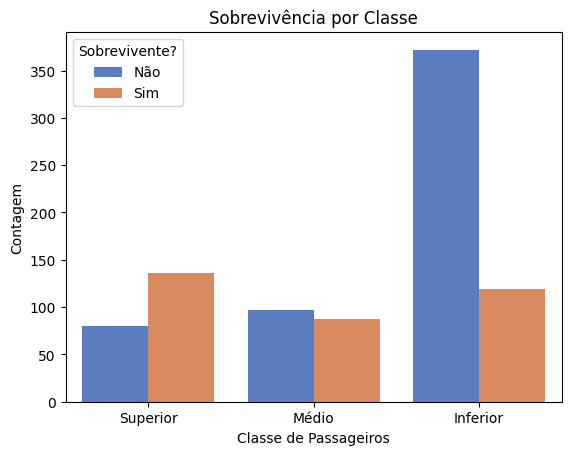

In [58]:
# Criar o gráfico
sns.countplot(data=df, x='Pclass', hue='Survived', palette='muted')
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe de Passageiros')
plt.ylabel('Contagem')

# Modificar os rótulos do eixo x
plt.xticks(ticks=[0, 1, 2], labels=['Superior', 'Médio', 'Inferior'])
plt.legend(title='Sobrevivente?', labels=['Não', 'Sim'])
plt.show()


### O sexo influencia a chance de sobrevivência?

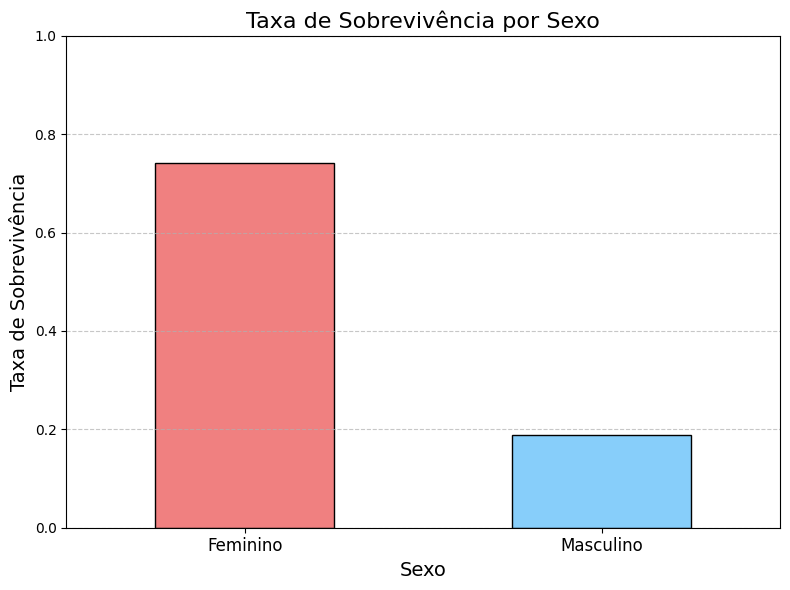

In [60]:
plt.figure(figsize=(8, 6))
sobrevivencia_por_sexo.plot(kind='bar', color=['lightcoral', 'lightskyblue'], edgecolor='black')
plt.title('Taxa de Sobrevivência por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Feminino', 'Masculino'], rotation=0, fontsize=12)
plt.ylim(0, 1)  # Taxa entre 0 e 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 2. Demografia:


### Qual é a distribuição etária dos passageiros?

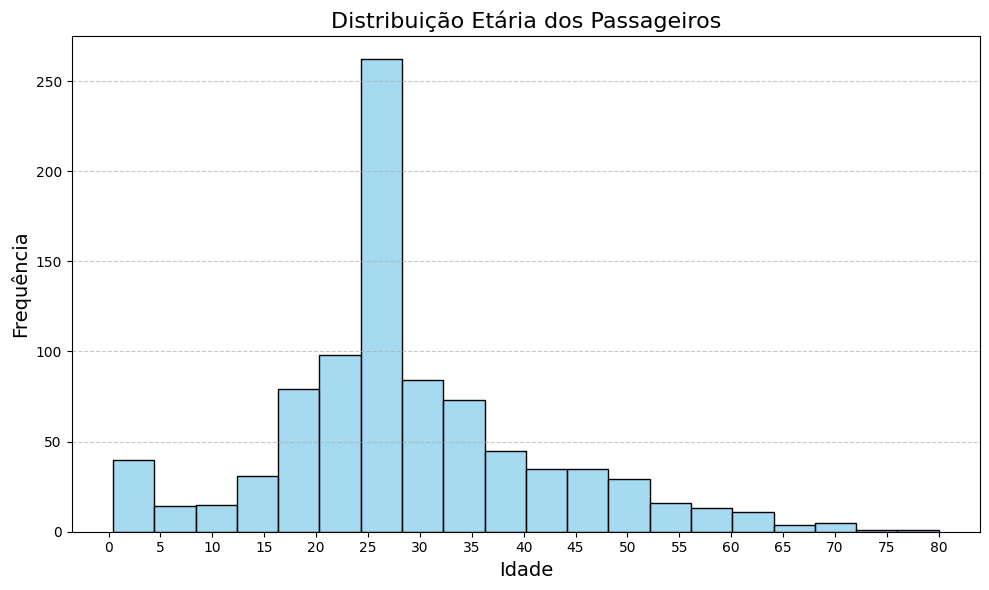

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=False, color="skyblue", edgecolor="black")
plt.title('Distribuição Etária dos Passageiros', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Ajustar o eixo X para exibir intervalos de 5 em 5 anos
plt.xticks(range(int(df['Age'].min()), int(df['Age'].max()) + 5, 5))

# Adicionar a grade
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()




### Existem diferenças de idade entre sobreviventes e não sobreviventes?

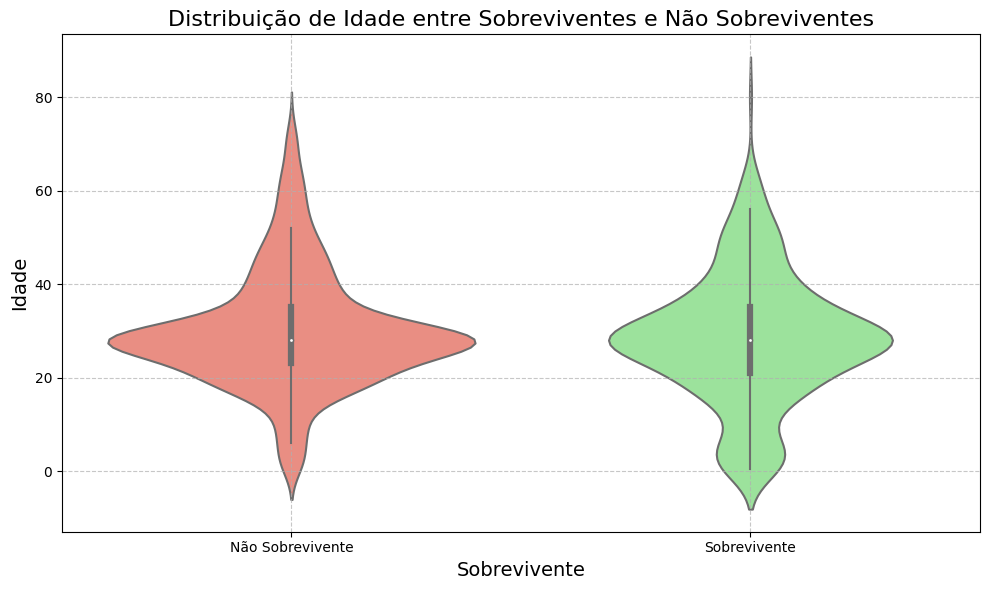

In [76]:
# Gráfico de violino para comparar a distribuição de idade entre sobreviventes e não sobreviventes
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, palette={0: 'salmon', 1: 'lightgreen'})
plt.title('Distribuição de Idade entre Sobreviventes e Não Sobreviventes', fontsize=16)
plt.xlabel('Sobrevivente', fontsize=14)
plt.ylabel('Idade', fontsize=14)
plt.xticks([0, 1], ['Não Sobrevivente', 'Sobrevivente'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




### 3. Tarifa e Classe:


### Passageiros que pagaram tarifas mais altas (Fare) têm maior probabilidade de sobreviver?


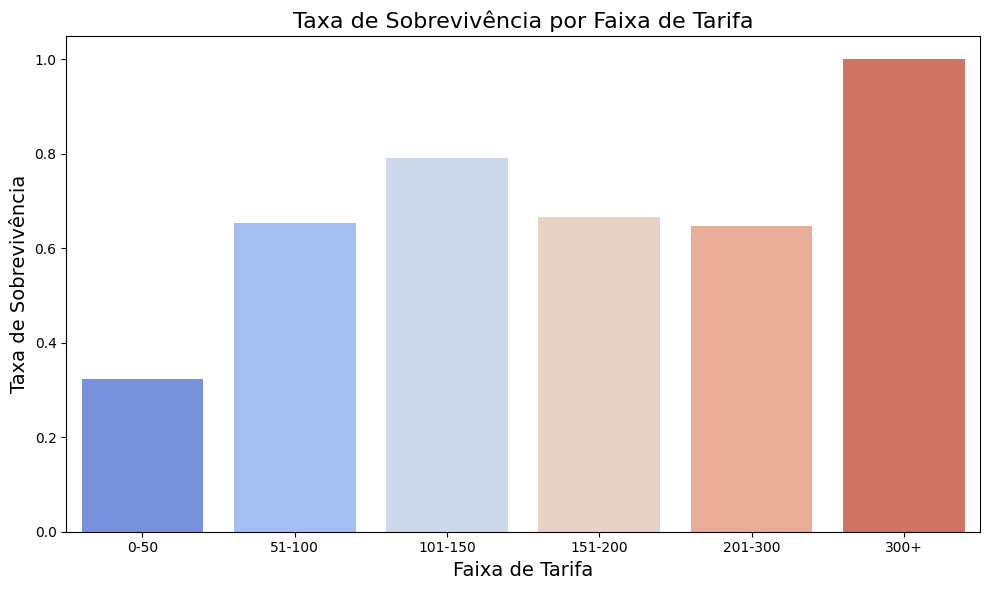

Taxa de sobrevivência por faixa de tarifa:
Fare
0-50       0.324022
51-100     0.654206
101-150    0.791667
151-200    0.666667
201-300    0.647059
300+       1.000000
Name: Survived, dtype: float64


In [81]:
# Definir as faixas de tarifa
faixa_tarifa = pd.cut(df['Fare'], bins=[0, 50, 100, 150, 200, 300, float('inf')], labels=['0-50', '51-100', '101-150', '151-200', '201-300', '300+'])

# Calcular a taxa de sobrevivência por faixa de tarifa
sobrevivencia_por_tarifa = df.groupby(faixa_tarifa)['Survived'].mean()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sobrevivencia_por_tarifa.index, y=sobrevivencia_por_tarifa.values, palette='coolwarm')
plt.title('Taxa de Sobrevivência por Faixa de Tarifa', fontsize=16)
plt.xlabel('Faixa de Tarifa', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.tight_layout()
plt.show()

# Exibindo a taxa de sobrevivência por faixa de tarifa
print("Taxa de sobrevivência por faixa de tarifa:")
print(sobrevivencia_por_tarifa)


### Porto de Embarque:


### Sobreviventes vêm mais frequentemente de um porto específico (Embarked)?


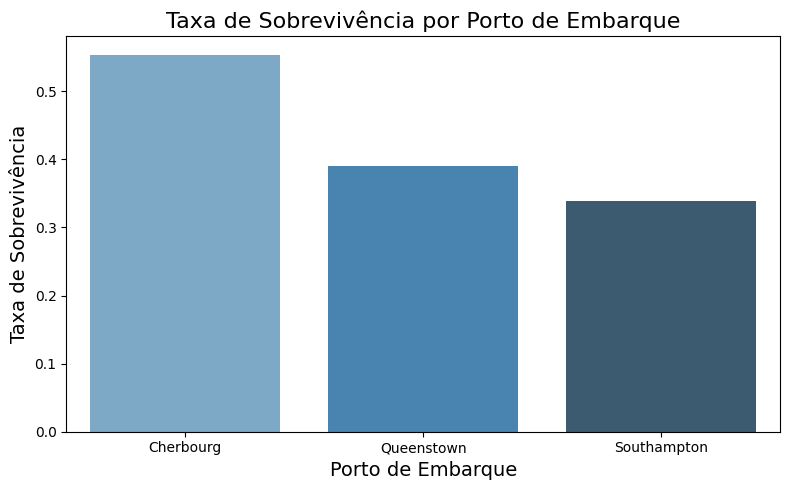

In [92]:
# Calcular a taxa de sobrevivência por porto de embarque
sobrevivencia_por_embarque = df.groupby('Embarked')['Survived'].mean()

# Substituir as abreviações pelos nomes completos dos portos
embarked_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
sobrevivencia_por_embarque.index = sobrevivencia_por_embarque.index.map(embarked_names)

# Plotar a taxa de sobrevivência por porto de embarque
plt.figure(figsize=(8, 5))
sns.barplot(x=sobrevivencia_por_embarque.index, y=sobrevivencia_por_embarque.values, palette='Blues_d')
plt.title('Taxa de Sobrevivência por Porto de Embarque', fontsize=16)
plt.xlabel('Porto de Embarque', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### O porto de embarque está relacionado à classe do bilhete?


<Figure size 1000x600 with 0 Axes>

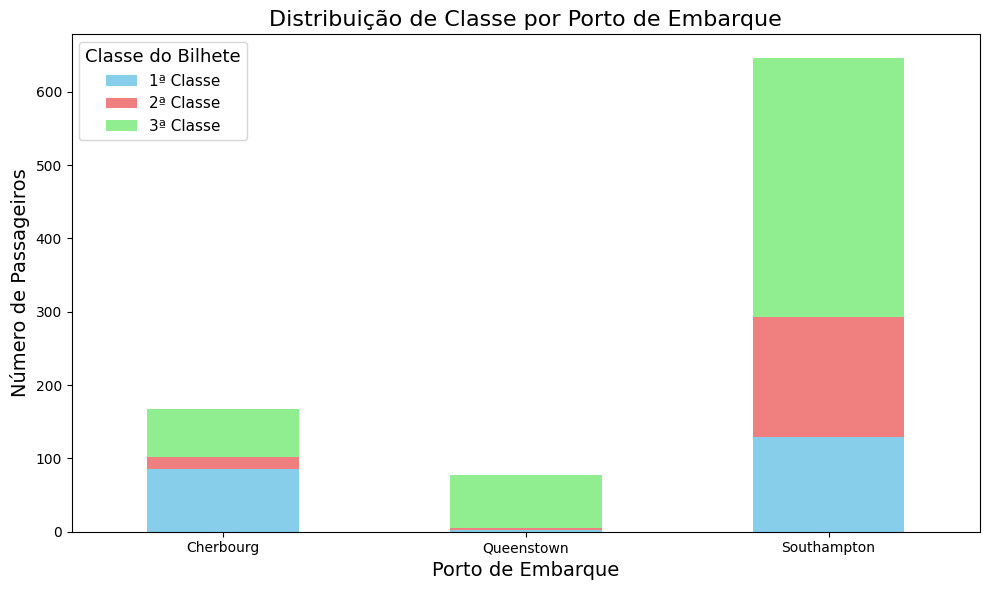

In [95]:
# Contar a quantidade de passageiros por porto de embarque e classe do bilhete
contagem_embarque_classe = df.groupby(['Embarked', 'Pclass']).size().unstack()

# Substituir os valores de Embarked por suas descrições
contagem_embarque_classe = contagem_embarque_classe.rename(index={'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# Plotar um gráfico de barras
plt.figure(figsize=(10, 6))
contagem_embarque_classe.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'], figsize=(10,6))
plt.title('Distribuição de Classe por Porto de Embarque', fontsize=16)
plt.xlabel('Porto de Embarque', fontsize=14)
plt.ylabel('Número de Passageiros', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Classe do Bilhete", title_fontsize='13', fontsize='11', labels=['1ª Classe', '2ª Classe', '3ª Classe'])
plt.tight_layout()
plt.show()



#### Usando escala Logarítma 

<Figure size 1000x600 with 0 Axes>

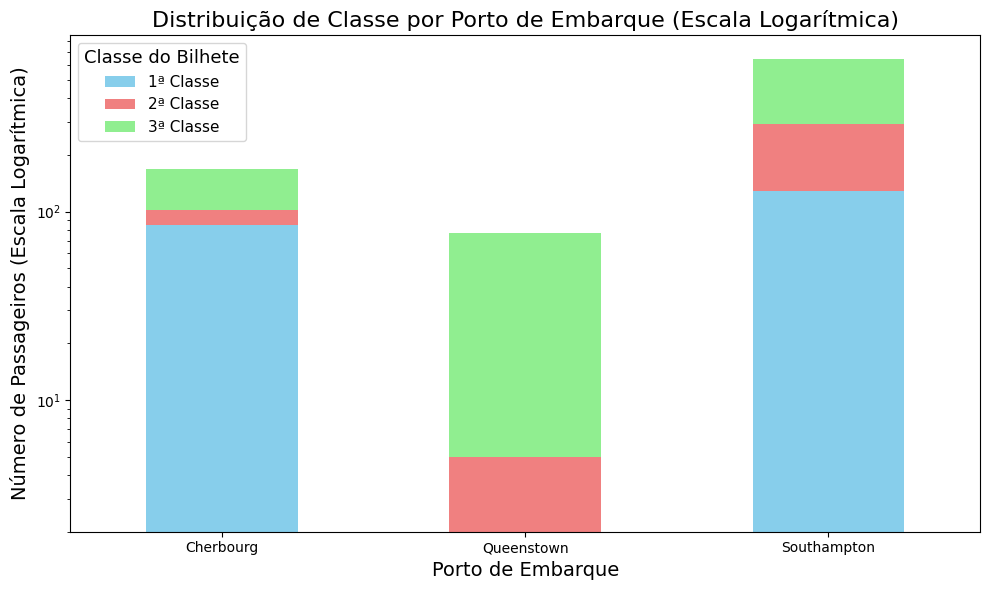

In [97]:
# Contar a quantidade de passageiros por porto de embarque e classe do bilhete
contagem_embarque_classe = df.groupby(['Embarked', 'Pclass']).size().unstack()

# Substituir os valores de Embarked por suas descrições
contagem_embarque_classe = contagem_embarque_classe.rename(index={'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

# Plotar um gráfico de barras com escala logarítmica no eixo y
plt.figure(figsize=(10, 6))
contagem_embarque_classe.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral', 'lightgreen'], figsize=(10,6))
plt.title('Distribuição de Classe por Porto de Embarque (Escala Logarítmica)', fontsize=16)
plt.xlabel('Porto de Embarque', fontsize=14)
plt.ylabel('Número de Passageiros (Escala Logarítmica)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Classe do Bilhete", title_fontsize='13', fontsize='11', labels=['1ª Classe', '2ª Classe', '3ª Classe'])
plt.yscale('log')  # Definindo a escala logarítmica no eixo y
plt.tight_layout()
plt.show()


### 4. Cabines:


### A localização da cabine pode ser um indicador de sobrevivência?

Taxa de sobrevivência por letra de cabine:
Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.320833
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64


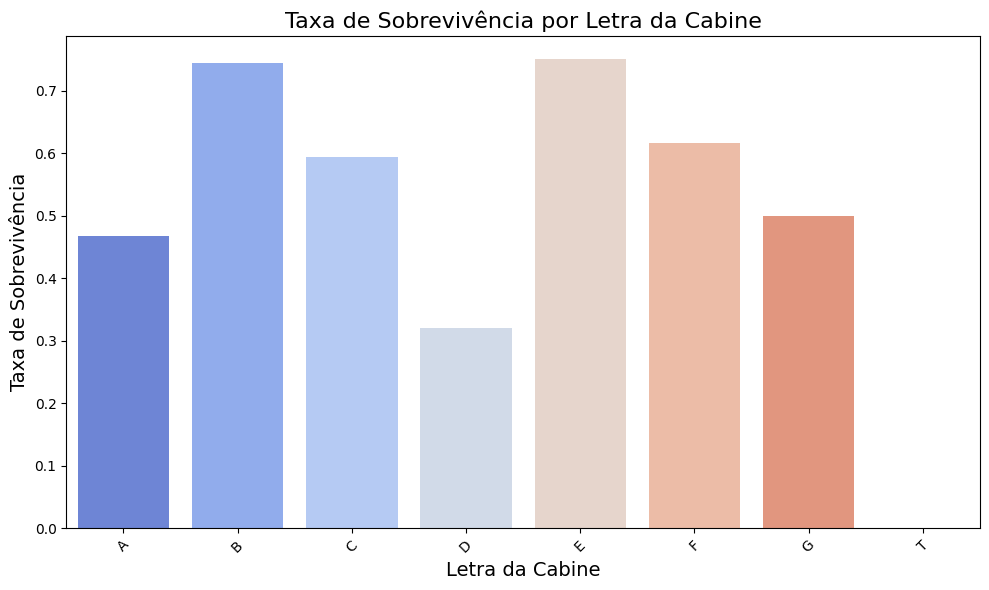

In [98]:
# Verificar as primeiras entradas da coluna "Cabin"
df['Cabin'] = df['Cabin'].dropna()  # Remover NaN para evitar problemas ao dividir
df['Cabin_Letter'] = df['Cabin'].str[0]  # Extrair apenas a letra da cabine

# Calcular a taxa de sobrevivência por letra de cabine
sobrevivencia_por_cabin = df.groupby('Cabin_Letter')['Survived'].mean()

# Exibir os resultados
print("Taxa de sobrevivência por letra de cabine:")
print(sobrevivencia_por_cabin)

# Visualizar a relação com gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sobrevivencia_por_cabin.index, y=sobrevivencia_por_cabin.values, palette='coolwarm')
plt.title('Taxa de Sobrevivência por Letra da Cabine', fontsize=16)
plt.xlabel('Letra da Cabine', fontsize=14)
plt.ylabel('Taxa de Sobrevivência', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Matriz de Correlação entre Variáveis

/tmp/ipykernel_2191/1010165783.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


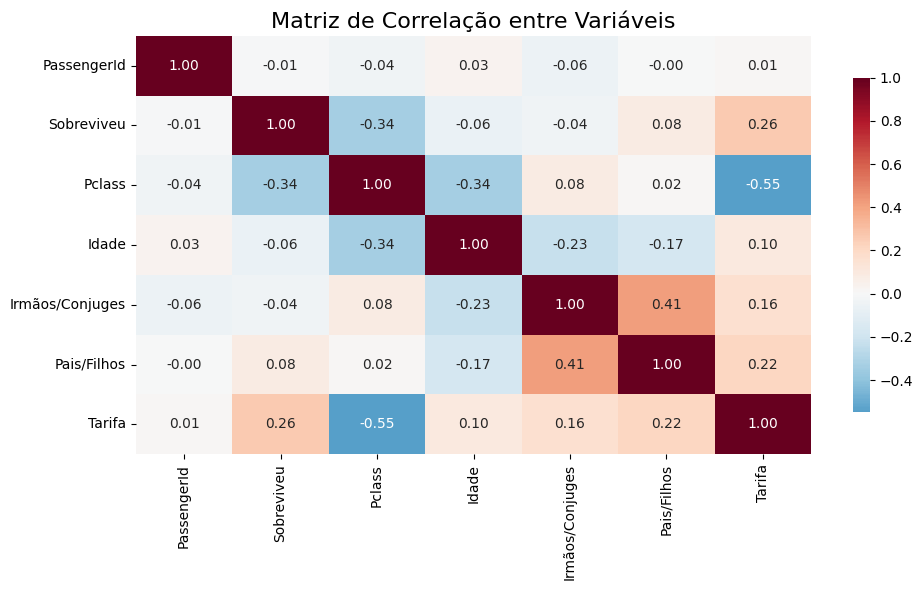

In [89]:
# Definindo um dicionário para traduzir os nomes das variáveis
translation_dict = {
    'Survived': 'Sobreviveu',
    'Fare': 'Tarifa',
    'Age': 'Idade',
    'SibSp': 'Irmãos/Conjuges',
    'Parch': 'Pais/Filhos'
}

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plotando a matriz de correlação com a tradução
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, cbar_kws={'shrink': 0.8}, fmt='.2f', 
            xticklabels=[translation_dict.get(col, col) for col in correlation_matrix.columns], 
            yticklabels=[translation_dict.get(col, col) for col in correlation_matrix.index])

plt.title('Matriz de Correlação entre Variáveis', fontsize=16)
plt.tight_layout()
plt.show()



## 3. Insights

### 1. Taxa de Sobrevivência por Classe de Passageiro (Pclass)

Passageiros da primeira classe (Pclass = 1) têm maior taxa de sobrevivência em comparação com aqueles da segunda e terceira classe (Pclass = 2 e Pclass = 3). Isso reflete a desigualdade social que provavelmente influenciou a prioridade na evacuação e o acesso aos botes salva-vidas.

Conclusão: A classe social teve um papel significativo nas chances de sobrevivência, com os passageiros de classes mais altas tendo mais acesso à segurança durante o desastre.

### 2. Taxa de Sobrevivência por Sexo (Sex)

As mulheres (especialmente em primeira classe) tinham maior taxa de sobrevivência do que os homens. Isso pode ser explicado por políticas de priorização feminina durante a evacuação.

Conclusão: A diferença de gênero teve impacto significativo nas chances de sobrevivência, com maior probabilidade de sobrevivência para mulheres e crianças.

### 3. Distribuição Etária dos Passageiros (Age)

A maior concentração de passageiros estava na faixa etária de 20 a 40 anos, com uma maior taxa de sobrevivência para crianças e uma menor taxa de sobrevivência para idosos.

Conclusão: As crianças (especialmente as de primeira classe) e as pessoas mais jovens tiveram maior chance de sobreviver, enquanto os idosos foram mais vulneráveis devido a dificuldades físicas ou falta de acesso aos botes.

### 4. Relação entre Tarifa (Fare) e Sobrevivência

Passageiros que pagaram tarifas mais altas geralmente eram de primeira classe e tinham maior chance de sobrevivência.

Conclusão: O valor da tarifa está diretamente relacionado à classe social e, por consequência, à sobrevivência, com os passageiros de classe mais alta tendo mais chances de serem priorizados na evacuação.

### 5. Distribuição de Sobrevivência por Porto de Embarque (Embarked)
Os passageiros que embarcaram em Cherbourg (C) apresentaram maior taxa de sobrevivência, seguidos por aqueles de Southampton (S) e Queenstown (Q), com a menor taxa de sobrevivência no último grupo.

Conclusão: O porto de embarque pode ter influência no status social dos passageiros, e os que embarcaram em Cherbourg possivelmente eram mais abastados, explicando a maior taxa de sobrevivência.

### 6. Relação entre Localização da Cabine (Cabin) e Sobrevivência
Passageiros das cabines A, B, C (primeira classe) têm maior taxa de sobrevivência, enquanto as cabines das classes mais baixas (D, E, F, etc.) têm uma menor taxa de sobrevivência.

Conclusão: A localização da cabine no navio está diretamente ligada à classe do passageiro, e os de primeira classe tiveram maior prioridade na evacuação e melhores condições de sobrevivência.

### 7. Sobrevivência por Idade e Sexo
As mulheres e crianças tinham uma taxa de sobrevivência mais alta, especialmente nas faixas etárias mais jovens.

Conclusão: Isso reforça a priorização de mulheres e crianças nas evacuações durante o desastre.

### 8. Impacto de Deslocamento (Deck) na Sobrevivência
Passageiros que estavam em decks superiores tinham uma maior probabilidade de sobrevivência, devido à maior proximidade com os botes salva-vidas e maior acessibilidade.

Conclusão: A posição no navio teve um impacto significativo nas chances de sobrevivência, com decks superiores favorecendo maior segurança.

### 9. Sobrevivência por Relação Familiar (SibSp, Parch)
Passageiros que viajavam sozinhos tinham uma menor chance de sobrevivência, enquanto aqueles com familiares a bordo (irmãos, pais) apresentaram uma maior taxa de sobrevivência.

Conclusão: Ter membros da família a bordo pode ter influenciado na cooperação para garantir a segurança, além da possibilidade 
de ser resgatado em grupo.

### 10. Sobrevivência e Relação com as Variáveis Categóricas
A sobrevivência parece estar fortemente ligada à classe social e ao sexo, com as mulheres da primeira classe tendo uma chance muito maior de sobrevivência.

Conclusão: A análise indica uma divisão clara nas chances de sobrevivência baseadas na classe social e gênero, com pessoas da classe alta (primeira classe) e mulheres sendo mais favorecidas.

### 11. Observações Gerais

Os dados reforçam a ideia de que a desigualdade social (classe, gênero, idade) teve um papel crucial na sobrevivência. Passageiros de primeira classe, mulheres e crianças tiveram muito mais chance de sobreviver do que os passageiros de segunda e terceira classe.

O desastre também mostrou como as políticas de evacuação eram influenciadas pela posição social e física dos passageiros no navio, refletindo uma estrutura social desigual.
